## HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES ##  
**KAGGLE COMPETITION - https://www.kaggle.com/c/house-prices-advanced-regression-techniques**  


## IMPORTING ##

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## ANALYSING DATASET ##

In [57]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Lets start off with a heatmap to see what all factors majorly affect SalePrice  

// FOR NOW WE ARE ONLY CHECKING INTO INT TYPE FACTORS; OBJECT TYPE FACTORS FOR FUTURE IMPROVEMENT

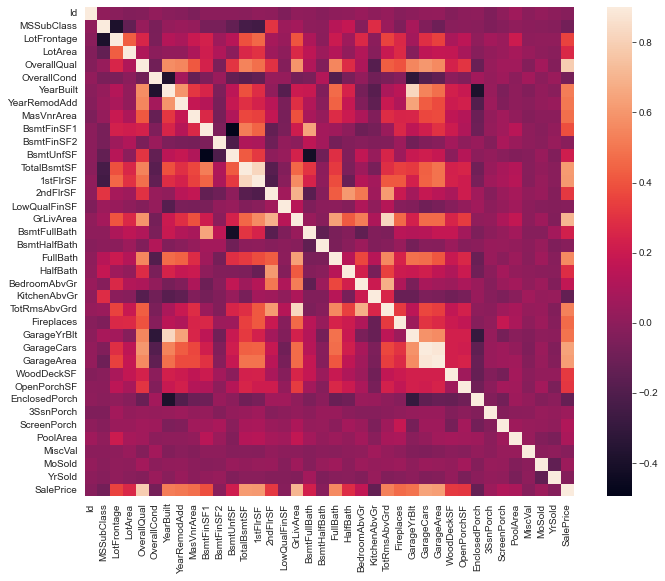

In [59]:
#first create a correlation matrix
corrmat = train.corr()
plt.subplots(figsize=(12,9))  #needed to show SalePrice for some reason
sns.heatmap(corrmat, vmax=0.9, square= True)
plt.show()

In [60]:
corrmat.sort_values(['SalePrice'], ascending=False, inplace = True)
print(corrmat.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Focusing on SalePrice, we can see the following show a higher corelation    

* OverallQual   
* GrLivArea  //removed TotRmsAbvGrd as these are the same
* GarageCars //removed GarageArea
* TotalBsmtSF //removed 1stFlrSF 
* FullBath      
* YearBuilt //assuming the data does not take into factor inflation and other econ stuff. Thats for another day.

**Analysing SalePrice**

In [61]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

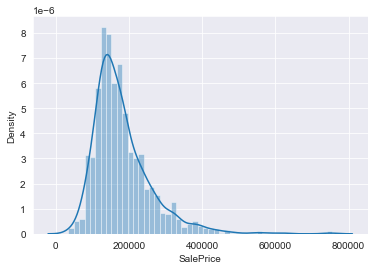

In [62]:
sns.distplot(train['SalePrice'])
plt.show()

## RELATIONSHIPS ##

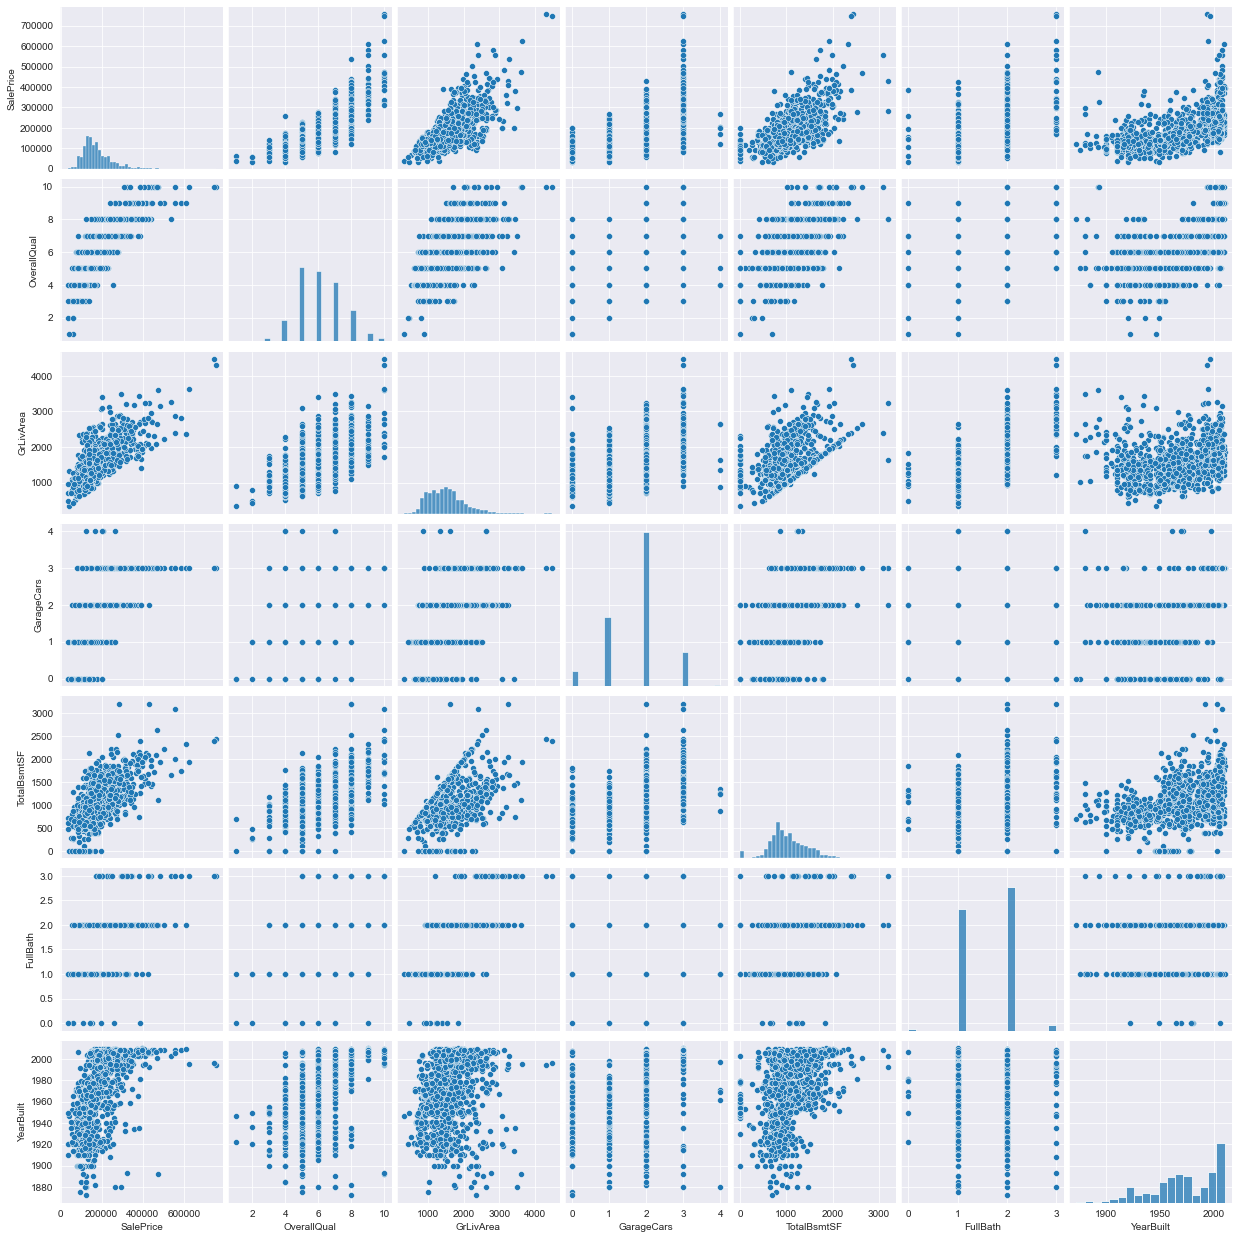

In [69]:
# pairplot- really cool feature of seaborn  (view in fullscreen)
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[features], size = 2.5)

**OverallQual vs SalePrice**

OverallQual -  Rating out of 10  
It is a Categorical feature(star rating category sort of) - boxplot may be used

In [64]:
train['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

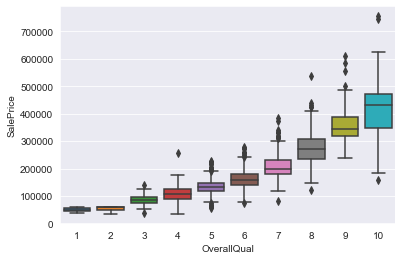

<Figure size 576x432 with 0 Axes>

In [65]:
sns.boxplot(x='OverallQual', y='SalePrice', data = train)
plt.figure(figsize=(8,6))
plt.show()

SalePrice increases with overall quality (*duh*)

**GrLivArea vs SalePrice**

In [66]:
train['GrLivArea'] #above ground living area in sqfeet
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

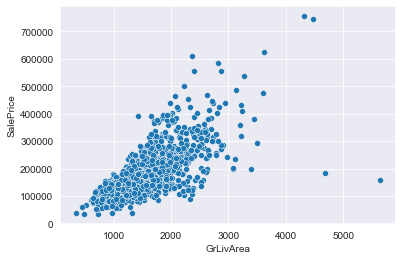

In [67]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()

We can see there are two outliers which do not follow the trend; they have very large areas but low SalePrice, and can be removed from the dataframe

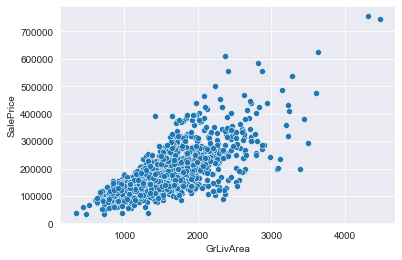

In [68]:
train= train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']<300000)].index)
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

**GarageCars VS SalePrice**

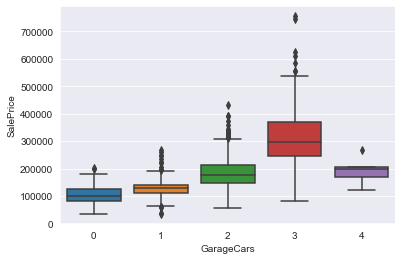

In [71]:
sns.boxplot(train['GarageCars'], train['SalePrice'])
plt.show()

For some reason, 4 GarageCars space costs much lower than 3..  
Not sure if these are outliers or not.


In [80]:
train[(train['GarageCars']==4)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


**TotalBsmtSF vs SalePrice**

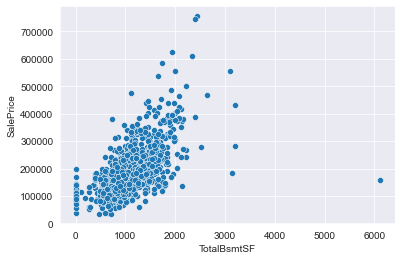

In [82]:
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])
plt.show()

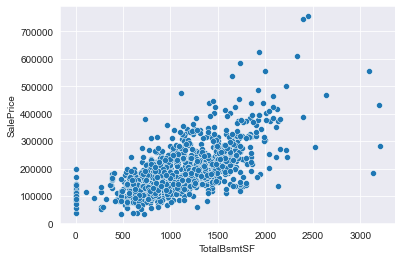

In [86]:
#removing the outlier
train =train.drop(train[(train['TotalBsmtSF']>5000) & (train['SalePrice']<200000)].index)
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])
plt.show()